**Mrinali Darwesh**

## TASK 2 : Prediction using Unsupervised ML (Level - Beginner) 

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

**Reading the data-set**

In [ ]:
data = pd.read_csv('Iris.csv')
print('Data import successfully')

Data import successfully


In [ ]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
print(data.tail())

      Id  SepalLengthCm  ...  PetalWidthCm         Species
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[5 rows x 6 columns]


In [ ]:
print(data.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


**Data Visualization**

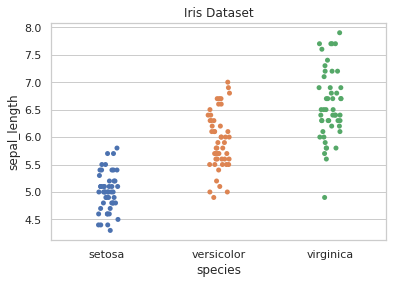

In [ ]:
sns.set(style='whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x='species',y='sepal_length',data=iris);
plt.title('Iris Dataset')
plt.show()

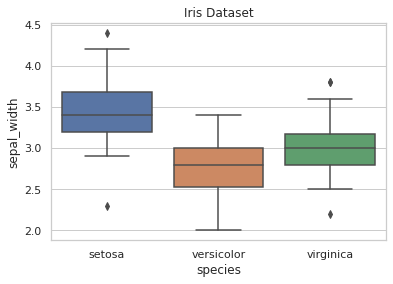

In [ ]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

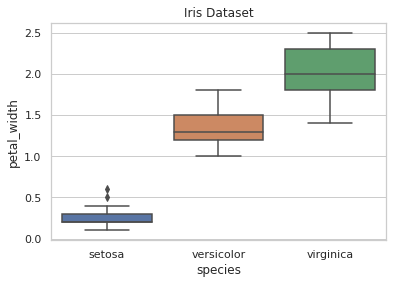

In [ ]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

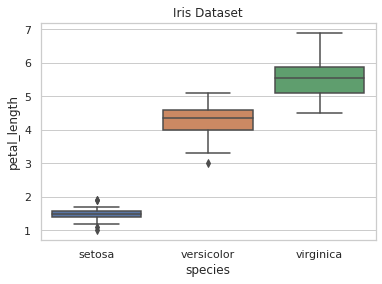

In [ ]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

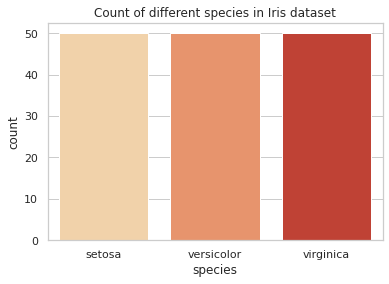

In [ ]:
sns.countplot(x='species',data=iris,palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

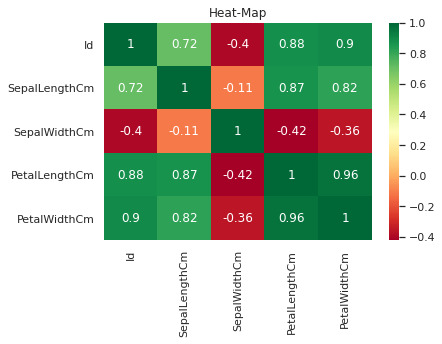

In [ ]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn')
plt.title("Heat-Map")
plt.show()

**Finding the optimum number of clusters using k-means clustering**

In [ ]:
x = data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i ,init='k-means++' ,max_iter=300 ,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  print('k:',i,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666665
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999998
k: 4 wcss: 17762.657226173542
k: 5 wcss: 11423.238080088988
k: 6 wcss: 7909.530673076923
k: 7 wcss: 5881.448116883117
k: 8 wcss: 4562.7800793650795
k: 9 wcss: 3579.72056127451
k: 10 wcss: 2968.491432665374


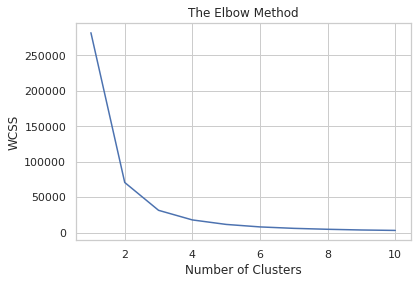

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Initializing K-Means With Optimum Number Of Clusters**

In [ ]:
kmeans=KMeans(n_clusters=3,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

**Predicting Values**

In [ ]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Visualizing the Clusters**

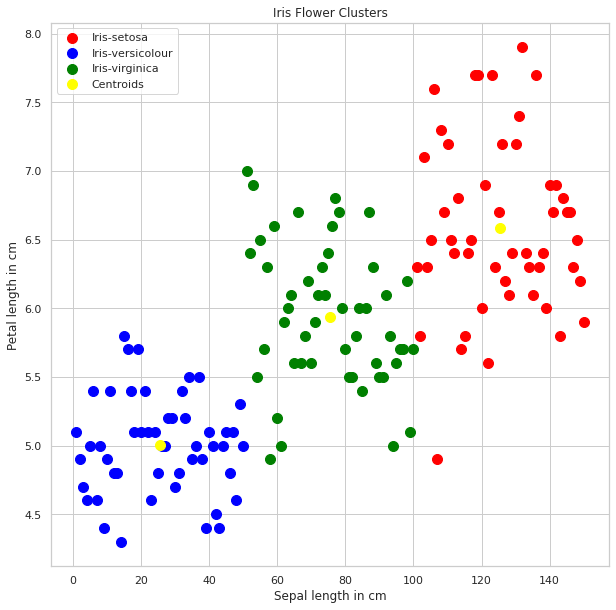

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.legend()
plt.show()

**Thank you...**